In [45]:
import pandas as pd
import pingouin as pg
from pingouin import rm_anova
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Fixation

In [37]:
fix_anova = pd.read_csv("csv_backup/fix_anova.csv", index_col=0)
fix_anova["log_acc"] = np.log(fix_anova.acc) #for a more "normally" distributed var
fix_anova.var()

acc        10680.393053
log_acc        0.189520
dtype: float64

<AxesSubplot:xlabel='model', ylabel='log_acc'>

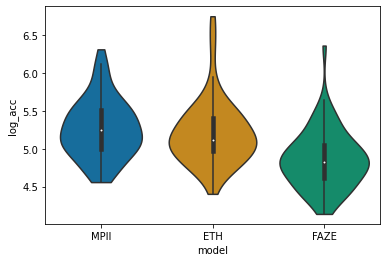

In [88]:
sns.violinplot(x="model", y="log_acc", data = fix_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [79]:
rm_anova(data=fix_anova, dv = 'acc', within = "model", subject='subject', detailed = True, effsize = 'n2')

,Source,SS,DF,MS,F,p-unc,p-GG-corr,n2,eps,sphericity,W-spher,p-spher
0,model,192501.270960,2,96250.635480,13.096799,0.000007,0.000199,0.092906,0.619485,False,0.385755,9.307298e-14
1,Error,940694.049687,128,7349.172263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
print(pg.pairwise_tests(dv='acc', within='model', subject='subject', padjust='bonf', data = fix_anova).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|-----------:|-----------:|
|  0 | model      | ETH  | FAZE | True     | True         |  3.69483  |    64 | two-sided     | 0.000457909 | 0.00137373  | bonf       | 52.84      |  0.61378   |
|  1 | model      | ETH  | MPII | True     | True         | -0.319826 |    64 | two-sided     | 0.750142    | 1           | bonf       |  0.143     | -0.0528065 |
|  2 | model      | FAZE | MPII | True     | True         | -9.79424  |    64 | two-sided     | 2.37738e-14 | 7.13215e-14 | bonf       |  3.055e+11 | -0.841153  |


### Zone Classification

In [6]:
zone_anova = pd.read_csv("csv_backup/zone_anova.csv", index_col = 0)
zone_anova.var()

accuracy    0.068996
MCC         0.076567
dtype: float64

<AxesSubplot:xlabel='model', ylabel='accuracy'>

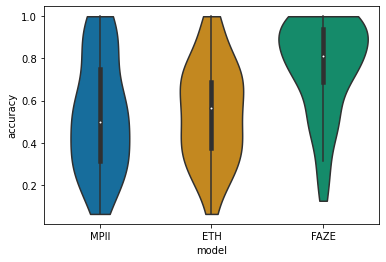

In [25]:
sns.violinplot(x="model", y="accuracy", data = zone_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [27]:
rm_anova(data=zone_anova, dv = 'accuracy', within = "model", subject='subject', detailed = True, effsize = 'n2')

,Source,SS,DF,MS,F,p-unc,n2,eps
0,model,2.142187,2,1.071094,34.445433,1.073993e-12,0.160041,0.972288
1,Error,3.980208,128,0.031095,NaN,NaN,NaN,NaN


In [28]:
print(pg.pairwise_tests(dv='accuracy', within='model', subject='subject', padjust='bonf', data = zone_anova).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|----------:|-----------:|
|  0 | model      | ETH  | FAZE | True     | True         | -7.37618  |    64 | two-sided     | 4.05638e-10 | 1.21692e-09 | bonf       | 2.577e+07 | -0.939858  |
|  1 | model      | ETH  | MPII | True     | True         |  0.345208 |    64 | two-sided     | 0.73107     | 1           | bonf       | 0.144     |  0.0458553 |
|  2 | model      | FAZE | MPII | True     | True         |  7.62646  |    64 | two-sided     | 1.46903e-10 | 4.4071e-10  | bonf       | 6.817e+07 |  0.919298  |


### FreeView

avg_fixations    11.681449
dtype: float64


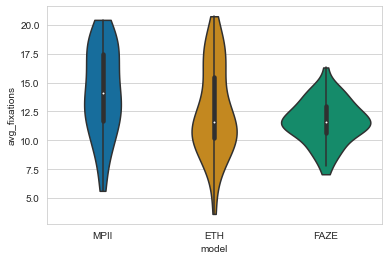

n_entropy    0.002753
dtype: float64


<AxesSubplot:xlabel='model', ylabel='n_entropy'>

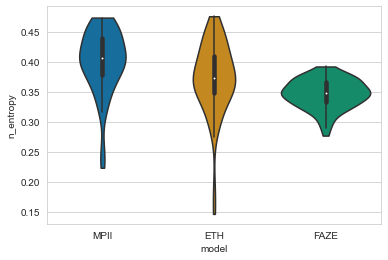

In [7]:
## using avg_fixations as the dependent var
fv_anova_avg_fixations = pd.read_csv("csv_backup/fv_anova_avg_fixations.csv", index_col = 0)
print(fv_anova_avg_fixations.var())
sns.violinplot(x="model", y="avg_fixations", data = fv_anova_avg_fixations, palette=sns.color_palette("colorblind",3), inner='box', cut=0)
plt.show()
## using norm_entropy as the dependent var
fv_anova_entropy = pd.read_csv("csv_backup/fv_anova_entropy.csv", index_col = 0)
print(fv_anova_entropy.var())
sns.violinplot(x="model", y="n_entropy", data = fv_anova_entropy, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [81]:
rm_anova(data=fv_anova_avg_fixations, dv = 'avg_fixations', within = "model", subject='subject', detailed = True, effsize = 'n2')

,Source,SS,DF,MS,F,p-unc,n2,eps
0,model,211.435136,2,105.717568,20.856674,1.444155e-08,0.093299,0.980764
1,Error,648.801843,128,5.068764,NaN,NaN,NaN,NaN


In [82]:
print(pg.pairwise_tests(dv='avg_fixations', within='model', subject='subject', padjust='bonf', data = fv_anova_avg_fixations).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|-----------:|----------:|
|  0 | model      | ETH  | FAZE | True     | True         |  2.09643 |    64 | two-sided     | 0.0400024   | 0.120007    | bonf       |      1.051 |  0.286584 |
|  1 | model      | ETH  | MPII | True     | True         | -4.48516 |    64 | two-sided     | 3.09336e-05 | 9.28007e-05 | bonf       |    627.508 | -0.432066 |
|  2 | model      | FAZE | MPII | True     | True         | -6.21951 |    64 | two-sided     | 4.25346e-08 | 1.27604e-07 | bonf       | 305700     | -0.84302  |


In [8]:
fv_anova_auc = pd.read_csv("csv_backup/fv_anova_auc.csv", index_col = 0)
print(fv_anova_auc.var())

avg_AUC    0.010941
dtype: float64


<AxesSubplot:xlabel='model', ylabel='avg_AUC'>

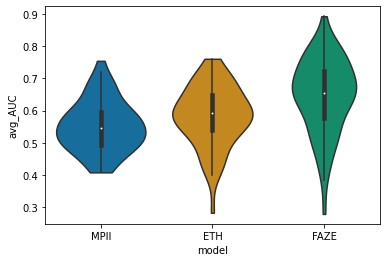

In [66]:
sns.violinplot(x="model", y="avg_AUC", data = fv_anova_auc, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

### Smooth Pursuit

In [9]:
sp_anova = pd.read_csv("csv_backup/sp_anova.csv", index_col=0)
sp_anova["log_err"] = np.log(sp_anova.err)
sp_anova.var()

err        300.245006
log_err      0.475061
dtype: float64

<AxesSubplot:xlabel='model', ylabel='log_err'>

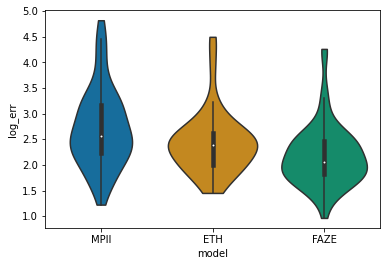

In [85]:
sns.violinplot(x="model", y="log_err", data = sp_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [51]:
rm_anova(data=sp_anova, dv = 'err', within = "model", subject='subject', detailed = True, effsize = 'n2')

,Source,SS,DF,MS,F,p-unc,p-GG-corr,n2,eps,sphericity,W-spher,p-spher
0,model,3276.866027,2,1638.433014,9.36415,0.00016,0.000502,0.056258,0.808882,False,0.763726,0.000205
1,Error,22395.991661,128,174.968685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
print(pg.pairwise_tests(dv='err', within='model', subject='subject', padjust='bonf', data = sp_anova).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|--------:|----------:|
|  0 | model      | ETH  | FAZE | True     | True         |  1.99739 |    64 | two-sided     | 0.0500374   | 0.150112    | bonf       |   0.875 |  0.253696 |
|  1 | model      | ETH  | MPII | True     | True         | -2.34846 |    64 | two-sided     | 0.0219521   | 0.0658564   | bonf       |   1.734 | -0.335186 |
|  2 | model      | FAZE | MPII | True     | True         | -4.1637  |    64 | two-sided     | 9.54582e-05 | 0.000286375 | bonf       | 221.673 | -0.557664 |


### 3x4 ANOVA

In [3]:
sns.set_style("whitegrid")

In [57]:
#Trying robust scaler instead of zscore  
# from sklearn.preprocessing import RobustScaler
# wide_df = pd.concat([fix_anova["acc"], zone_anova["recall"], fv_anova_auc["avg_AUC"], sp_anova["err"]], axis=1)
# trans = RobustScaler()
# temp_df = pd.DataFrame(trans.fit_transform(wide_df), columns = ["Fixation", "Zone_Classification", "Free_Viewing", "Smooth_Pursuit"])
# plt.figure(figsize=(16,8))
# sns.violinplot(data=temp_df)

In [10]:
from scipy.stats import zscore
# from scipy.stats import median_absolute_deviation
#log transforms for making distributions normal with comparable variation ranges
fix_anova["score"] = zscore(fix_anova["log_acc"]) #Lower auccuracy value is better
zone_anova["score"] = zscore(-1*zone_anova["accuracy"])  #higher accuracy value is better
fv_anova_auc["score"] = zscore(-1*fv_anova_auc["avg_AUC"]) #higher AUC is better
sp_anova["score"] = zscore(sp_anova["log_err"]) #Lower error is better

In [13]:
fix_anova

,model,subject,acc,log_acc,score
0,MPII,s25,248.203952,5.514251,0.931840
1,MPII,s81,237.493663,5.470141,0.830256
2,MPII,s61,109.103120,4.692293,-0.961107
3,MPII,s87,218.872729,5.388490,0.642217
4,MPII,s86,294.978388,5.686902,1.329452
...,...,...,...,...,...
190,FAZE,s115,118.049995,4.771108,-0.779599
191,FAZE,s103,87.616594,4.472970,-1.466203
192,FAZE,s102,124.664990,4.825630,-0.654037
193,FAZE,s32,100.480483,4.609964,-1.150711


In [14]:
long_df = pd.concat([fix_anova[["model", "subject", "score"]],
                  zone_anova[["model", "subject", "score"]],
                  fv_anova_auc[["model", "subject", "score"]],
                 sp_anova[["model", "subject", "score"]]],
           keys=["Fixation", "Zone_Classification", "FreeView", "Smooth_Pursuit"], names=["task"]).reset_index()
long_df = long_df.drop("level_1", axis = 1)

# long_df = long_df[abs(long_df.score)<3] #Thresholding to 3 std, comment to disable

In [100]:
# long_df["score"] = long_df.score.clip(-3,3)

In [58]:
ProfileReport(long_df)

NameError: name 'ProfileReport' is not defined

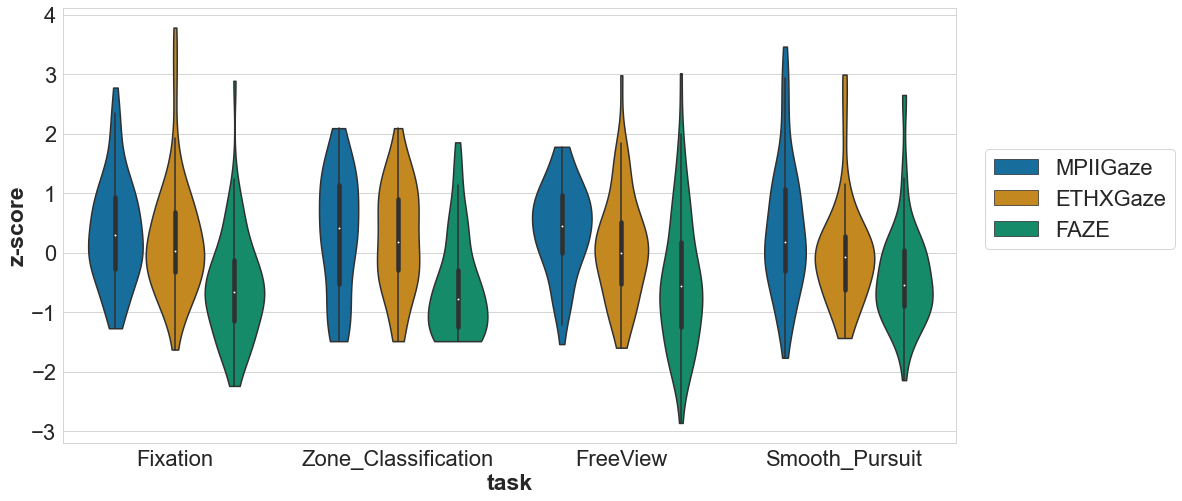

In [15]:
plt.figure(figsize=(16,8))
sns.violinplot(x="task", y="score", hue="model", data = long_df, palette=sns.color_palette("colorblind",3), inner='box', cut=0)
plt.tick_params(axis = "both", labelsize=22)
plt.ylabel("z-score",fontsize=23, fontweight = 550)
plt.xlabel("task",fontsize=23, fontweight = 550)
L=plt.legend(prop={'size': 22},  bbox_to_anchor=(1.02, 0.7))
L.get_texts()[0].set_text('MPIIGaze')
L.get_texts()[1].set_text('ETHXGaze')
# plt.savefig("../anova_task_model_transformed.png", dpi=300)

<AxesSubplot:xlabel='model', ylabel='score'>

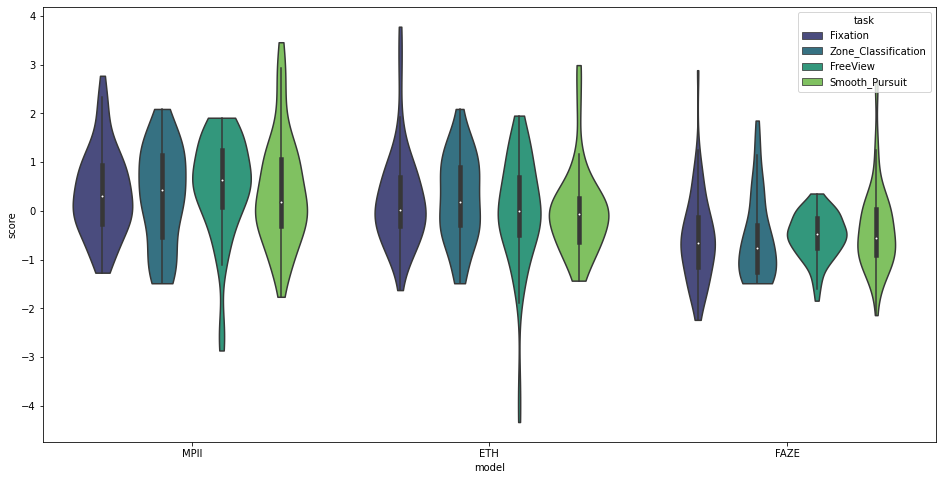

In [118]:
plt.figure(figsize=(16,8))
sns.violinplot(x="model", y="score", hue="task", data = long_df, palette=sns.color_palette("viridis",4), inner='box', cut=0)
# plt.savefig("anova_models.png", dpi=300)

<AxesSubplot:xlabel='model', ylabel='score'>

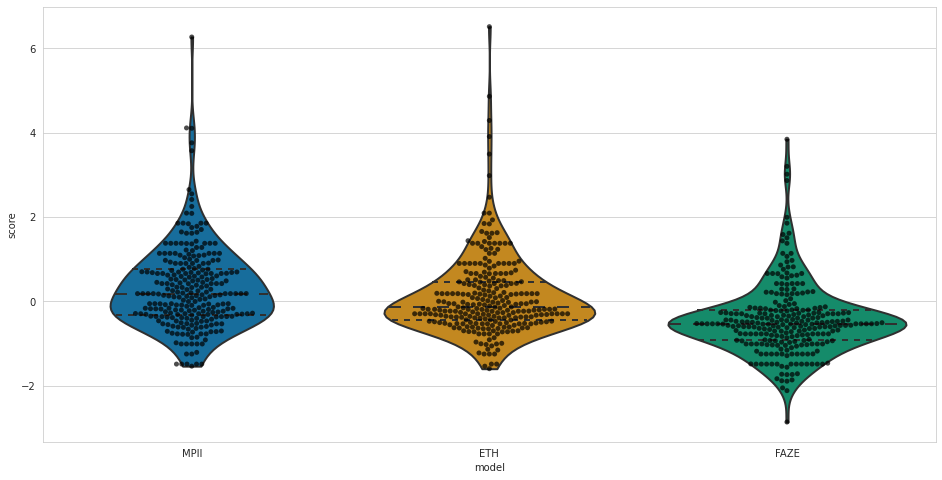

In [308]:
plt.figure(figsize=(16,8))
sns.violinplot(x="model", y="score",  data = long_df, inner="quartile",  cut=0, palette= sns.color_palette("colorblind",3), linewidth=2)
sns.swarmplot(x="model", y="score",  data = long_df, color="black", alpha=0.7)

In [16]:
rm_anova(data=long_df, dv = 'score', within = ["task","model"], subject='subject', detailed = True, effsize = 'np2')

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,task,1.831280e-28,3,192,6.104268e-29,9.001888e-29,1.000000e+00,1.000000e+00,1.406545e-30,0.916556
1,model,1.072931e+02,2,128,5.364655e+01,5.712238e+01,1.858474e-18,3.743436e-18,4.716088e-01,0.980982
2,task * model,4.951178e+00,6,384,8.251963e-01,2.062332e+00,5.678363e-02,8.287094e-02,3.121797e-02,0.697793


In [71]:
print(pg.pairwise_tests(dv='score', within=['model','task'], subject='subject', padjust='bonf', data = long_df).to_markdown())

|    | Contrast     | model   | A              | B                   | Paired   | Parametric   |             T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |          BF10 |       hedges |
|---:|:-------------|:--------|:---------------|:--------------------|:---------|:-------------|--------------:|------:|:--------------|------------:|------------:|:-----------|--------------:|-------------:|
|  0 | model        | -       | ETH            | FAZE                | True     | True         |   2.7503      |    64 | two-sided     | 0.00773261  | 0.0231978   | bonf       |     4.246     |  0.432073    |
|  1 | model        | -       | ETH            | MPII                | True     | True         |  -4.05967     |    64 | two-sided     | 0.000136281 | 0.000408844 | bonf       |   159.819     | -0.565309    |
|  2 | model        | -       | FAZE           | MPII                | True     | True         | -10.1219      |    64 | two-sided     | 6.53063e-15 | 1.95919e-14 |

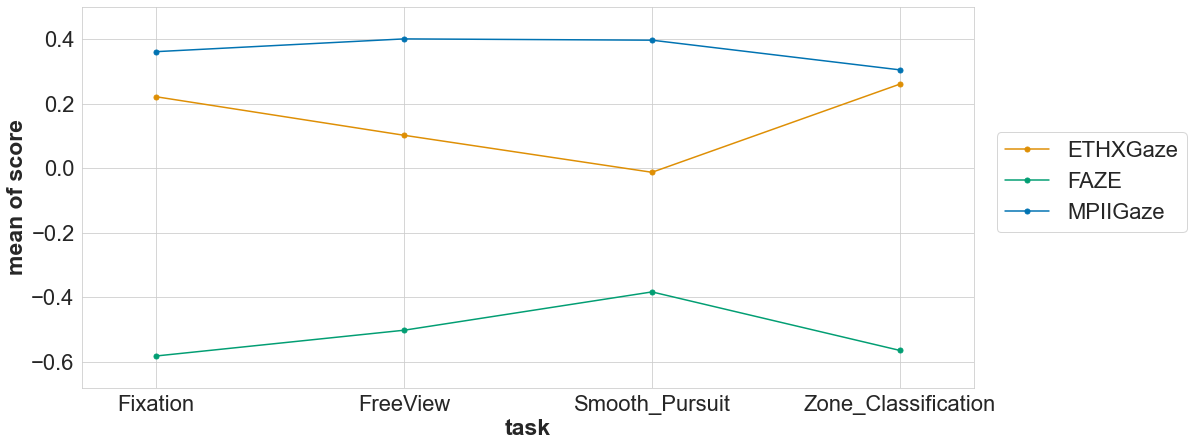

In [36]:
from statsmodels.graphics.factorplots import interaction_plot
plt.rc("figure", figsize=(16,7))
pal = sns.color_palette("colorblind",3)
interaction_plot(long_df["task"], long_df["model"], long_df["score"], colors = pal[1:]+[pal[0]], ms = 10)

plt.tick_params(axis = "both", labelsize=22)
plt.ylabel("mean of score",fontsize=23, fontweight = 550)
plt.xlabel("task",fontsize=23, fontweight = 550)
L=plt.legend(prop={'size': 22}, bbox_to_anchor=(1.25, 0.7))
L.get_texts()[0].set_text('ETHXGaze')
L.get_texts()[2].set_text('MPIIGaze')
plt.savefig("../3x4anova.png")

### Blinks

In [170]:
blinks_anova = pd.read_csv("csv_backup/blinks_anova.csv", index_col = 0)

In [171]:
blinks_anova = blinks_anova[blinks_anova.avg_blinks_per_trial > 0]
blinks_anova["log_avg_blinks_per_trial"] = np.log(blinks_anova["avg_blinks_per_trial"])
blinks_anova.var()

avg_blinks_per_trial        2.021278
log_avg_blinks_per_trial    0.091736
dtype: float64

<AxesSubplot:xlabel='factor', ylabel='avg_blinks_per_trial'>

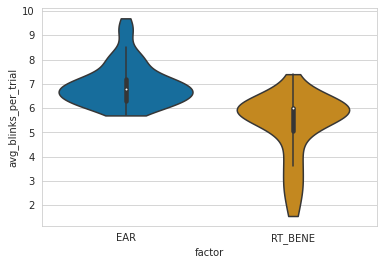

In [348]:
sns.violinplot(x="factor", y="avg_blinks_per_trial", data = blinks_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [349]:
#ANOVA
rm_anova(data=blinks_anova, dv = "avg_blinks_per_trial", within = "factor", subject='subject', detailed = True, effsize = 'n2')

,Source,SS,DF,MS,F,p-unc,n2,eps
0,factor,91.336205,1,91.336205,54.721426,4.799347e-10,0.362909,1.0
1,Error,101.815850,61,1.669112,NaN,NaN,NaN,NaN


In [286]:
print(pg.pairwise_tests(dv="avg_blinks_per_trial", within='factor', subject='subject', padjust='bonf', data = blinks_anova).to_markdown())

|    | Contrast   | A   | B       | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |      BF10 |   hedges |
|---:|:-----------|:----|:--------|:---------|:-------------|--------:|------:|:--------------|------------:|----------:|---------:|
|  0 | factor     | EAR | RT_BENE | True     | True         | 7.39739 |    61 | two-sided     | 4.79935e-10 | 2.208e+07 |  1.48804 |


In [ ]:
# log transform only for SP and Fixation
# clip vs threshold for zscore


In [327]:
blinks_anova.groupby("factor").mean()

,avg_blinks_per_trial,log_avg_blinks_per_trial
factor,,
EAR,6.994725,1.938108
RT_BENE,5.285125,1.616566
